In [134]:
import warnings
warnings.filterwarnings("ignore")

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.exceptions import NotFittedError
from scipy.stats import mode
from numpy.linalg import norm

# KNN

## Importation des données

In [135]:
colnames = [f"Var{i}" for i in range(1,7)]
colnames.append("Class")
dataset = pd.read_csv("data.csv",names=colnames)
dataset["Class"] = dataset["Class"].apply(lambda x: x[-1])
dataset.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Class
0,5.316975,1.18127,-0.040245,1.566224,0.804565,0.01365,B
1,5.242525,1.12047,-0.030245,1.514974,0.814565,0.00365,B
2,4.580975,0.88392,0.009755,1.287924,0.814565,-0.05635,D
3,3.731775,0.93762,-0.140245,1.136574,0.814565,0.09365,C
4,4.500925,1.04847,-0.140245,1.271224,0.794565,0.08365,A


In [125]:
colnames = [f"Var{i}" for i in range(1,7)]
colnames.append("Class")
dataset_pretest = pd.read_csv("preTest.csv",names=colnames)
dataset_pretest["Class"] = dataset_pretest["Class"].apply(lambda x: x[-1])
dataset_pretest.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Class
0,5.837498,1.329108,0.201185,1.721383,0.263455,0.497376,B
1,3.989348,0.947658,0.171185,1.199333,0.263455,0.517376,C
2,5.268698,1.174208,0.211185,1.534233,0.253455,0.487376,B
3,5.593398,1.195308,0.201185,1.552133,0.263455,0.497376,A
4,4.091948,1.009908,0.131185,1.234283,0.263455,0.547376,C


In [126]:
colnames = [f"Var{i}" for i in range(1,7)]
dataset_final = pd.read_csv("finalTest.csv",names=colnames)
dataset_final.head()

,Var1,Var2,Var3,Var4,Var5,Var6
0,5.672548,1.315558,0.151185,1.632833,0.253455,0.527376
1,5.533198,1.281308,0.191185,1.647633,0.263455,0.497376
2,7.201398,1.761408,0.131185,2.146483,0.263455,0.547376
3,4.080498,0.953708,0.181185,1.210083,0.263455,0.517376
4,3.961898,0.934708,0.181185,1.190733,0.263455,0.507376


In [5]:
dataset.describe()

,Var1,Var2,Var3,Var4,Var5,Var6
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,4.840189,1.084546,-0.071129,1.408835,0.810642,0.030574
std,1.015314,0.240708,0.053829,0.292606,0.005966,0.047720
min,3.398525,0.772920,-0.300245,1.027724,0.774565,-0.086350
25%,4.072750,0.928695,-0.110245,1.209674,0.804565,-0.006350
50%,4.720875,0.992570,-0.070245,1.342824,0.814565,0.033650
75%,5.265075,1.180220,-0.030245,1.519574,0.814565,0.063650
max,9.476125,2.132970,0.039755,2.771174,0.814565,0.163650


In [6]:
dataset_pretest.describe()

,Var1,Var2,Var3,Var4,Var5,Var6
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,4.840189,1.084546,-0.071129,1.408835,0.810642,0.030574
std,1.015314,0.240708,0.053829,0.292606,0.005966,0.047720
min,3.398525,0.772920,-0.300245,1.027724,0.774565,-0.086350
25%,4.072750,0.928695,-0.110245,1.209674,0.804565,-0.006350
50%,4.720875,0.992570,-0.070245,1.342824,0.814565,0.033650
75%,5.265075,1.180220,-0.030245,1.519574,0.814565,0.063650
max,9.476125,2.132970,0.039755,2.771174,0.814565,0.163650


In [7]:
dataset_final.describe()

,Var1,Var2,Var3,Var4,Var5,Var6
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,4.866841,1.090554,0.190945,1.413336,0.259705,0.493810
std,1.046235,0.252496,0.054252,0.301535,0.005976,0.048046
min,3.336998,0.762258,-0.038815,1.018683,0.223455,0.377376
25%,4.099411,0.932146,0.151185,1.213108,0.253455,0.457376
50%,4.689248,0.997433,0.191185,1.334458,0.263455,0.497376
75%,5.286161,1.178546,0.231185,1.516683,0.263455,0.527376
max,9.134198,2.297008,0.301185,2.707983,0.263455,0.637376


## A- Exploratory Data Analysis
### Objectif :
- Comprendre du mieux possible nos données  


In [8]:
df = dataset.copy()

### Analyse de Forme :  
- **Variables et target**:   
Il y a 6 variables et une target Class.

- **Lignes**:

In [9]:
df.shape

(803, 7)

Il y a 803 lignes dans le dataset.

- **Types de variables**: 

In [10]:
df[colnames[:-1]].dtypes.value_counts()

float64    5
dtype: int64

Les variables sont quantatives continue.

- **Analyse des valeurs manquantes**: 

In [11]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Var1     0.0
Var2     0.0
Var3     0.0
Var4     0.0
Var5     0.0
Var6     0.0
Class    0.0
dtype: float64

Le dataset est complet (pas de valeurs manquantes).

### Analyse de Fond :
- **Visualisation de la target**:

In [12]:
df['Class'].value_counts(normalize=True)

C    0.321295
D    0.245330
B    0.195517
A    0.176837
E    0.061021
Name: Class, dtype: float64

Les classes A et B sont les plus fréquentes.  
Laclasse C est très peu présente.

- **Signification des variables**:

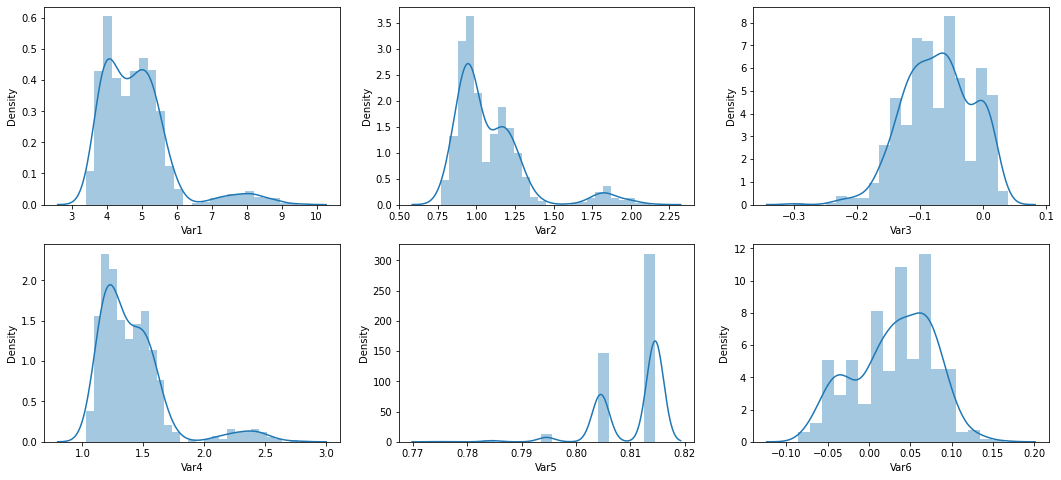

In [13]:
plt.figure(figsize=(18,8))
index = 1
for col in df.select_dtypes('float64'):
    plt.subplot(2,3,index)
    sns.distplot(df[col])
    index += 1

plt.savefig("signification_variables")
plt.show()

Centrer et réduire les données est une piste à envisager.

- **Relation Variables/Target**:

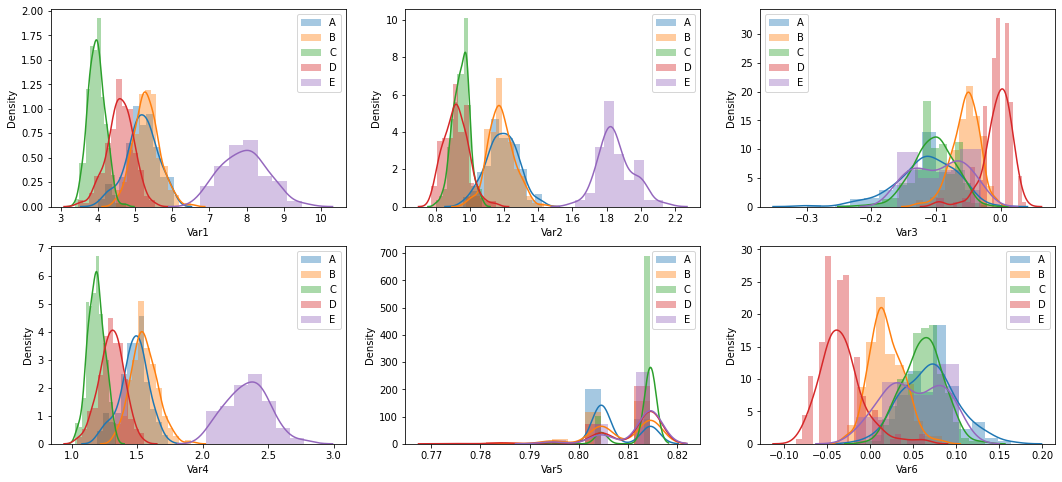

In [14]:
index=1
row = 1
column = 1
plt.figure(figsize=(18,8))
for col in df.select_dtypes('float64'):
    plt.subplot(2,3,index)
    sns.distplot(df[df["Class"]=="A"][col], label='A')
    sns.distplot(df[df["Class"]=="B"][col], label='B')
    sns.distplot(df[df["Class"]=="C"][col], label='C')
    sns.distplot(df[df["Class"]=="D"][col], label='D')
    sns.distplot(df[df["Class"]=="E"][col], label='E')
    plt.legend()
    index += 1

plt.savefig("relation_variable_target")
plt.show()

Groupes:
- **Var 1:** C, D, AB, E
- **Var 2:** CD, AB, E
- **Var 3:** ACE, B, D
- **Var 4:** C, D, ABE
- **Var 5:** Pas utile 
- **Var 6:** D, B, CAE

- **Relation Variables/Variables**

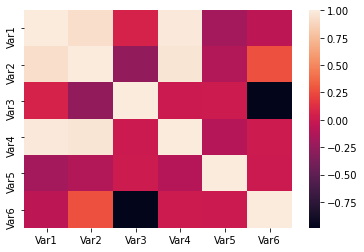

In [15]:
plt.figure()
sns.heatmap(df.select_dtypes("float64").corr())
plt.savefig("relation_entre_variables")
plt.show()

Les variables 3 et 6 sont très corrélées.  
Une seule des variables 3 ou 6 suffit.

<Figure size 432x288 with 0 Axes>

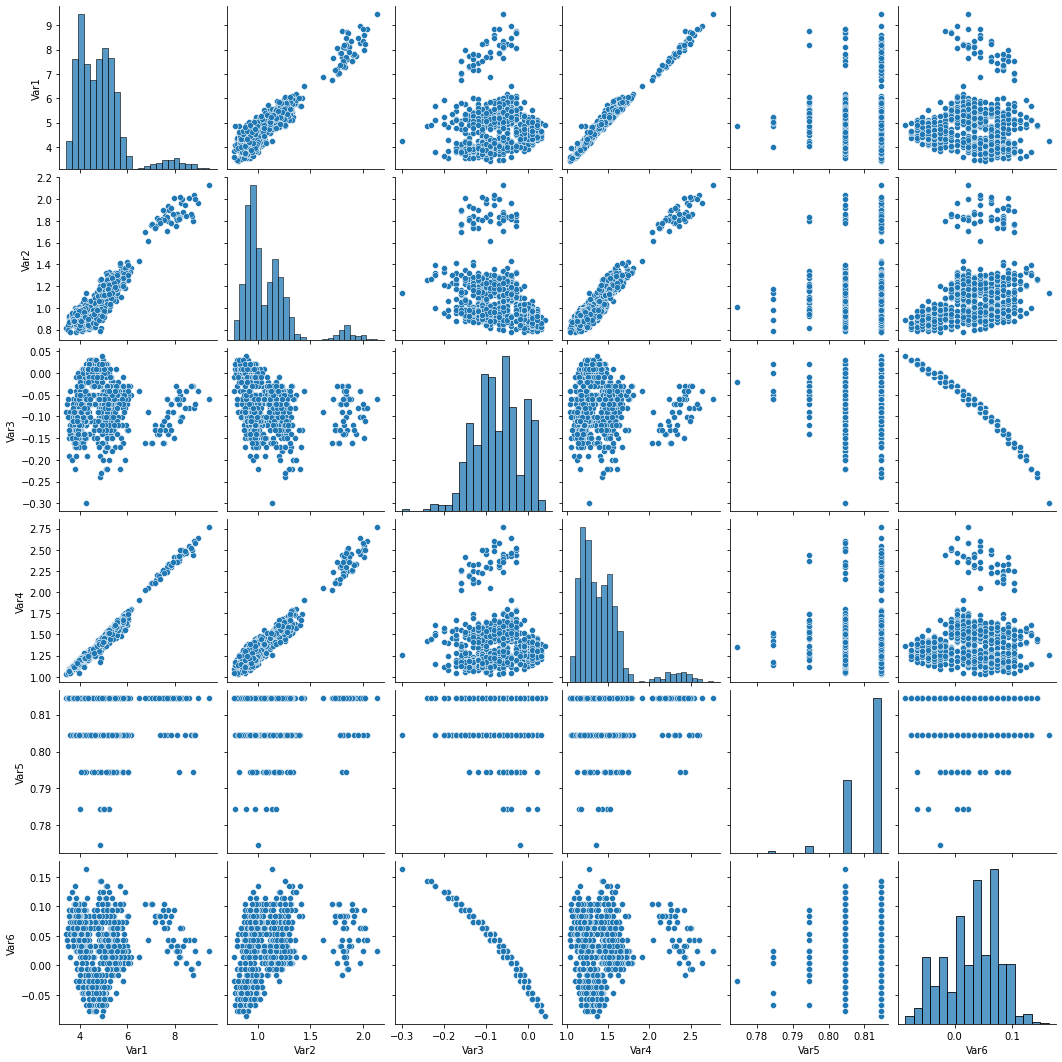

In [16]:
plt.figure()
sns.pairplot(df.select_dtypes("float64"))
plt.savefig("relation_entre_variables_pairplot")
plt.show()

Avec ses graphiques on peut vérifier les affirmations précédentes:  
1) la variable 5 n'est pas du tout intéressante pour la régression  
2) il y a une corrélation forte entre les variables 3 et 6

In [17]:
dataset.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Class'], dtype='object')

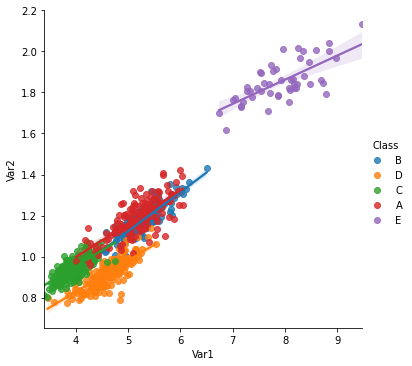

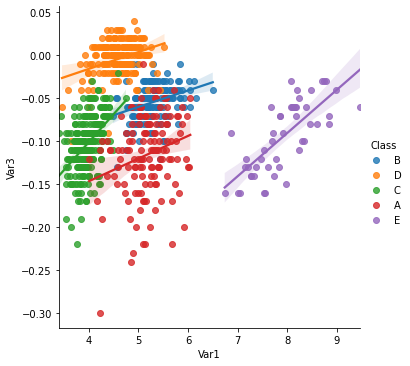

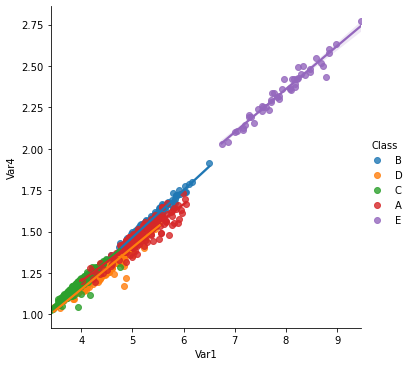

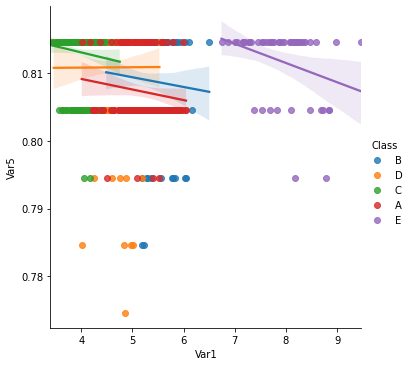

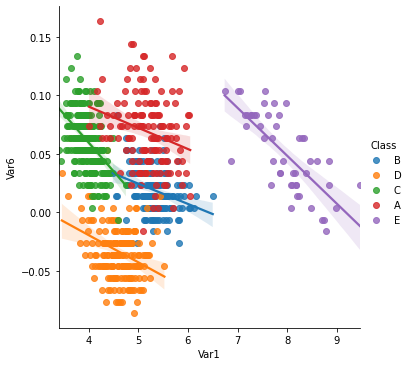

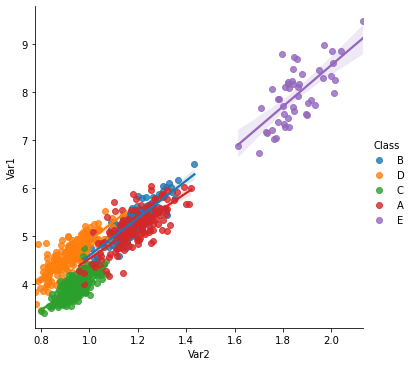

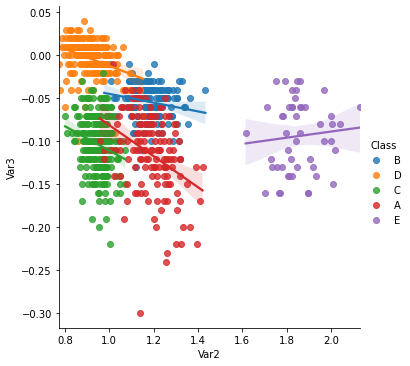

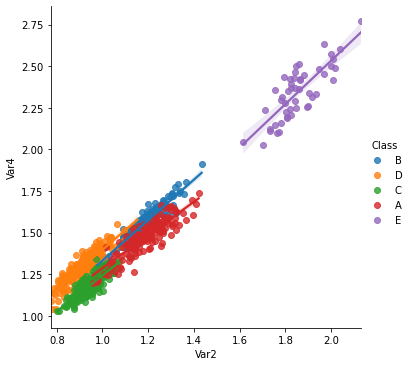

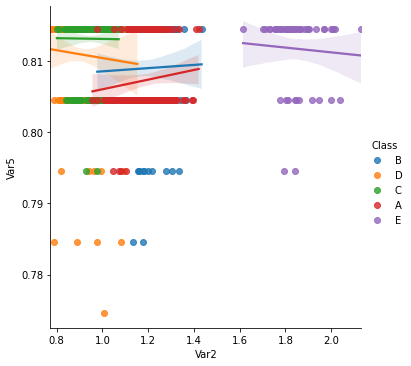

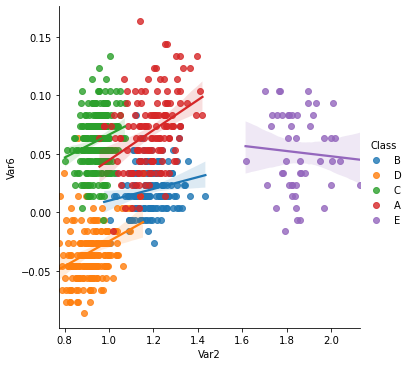

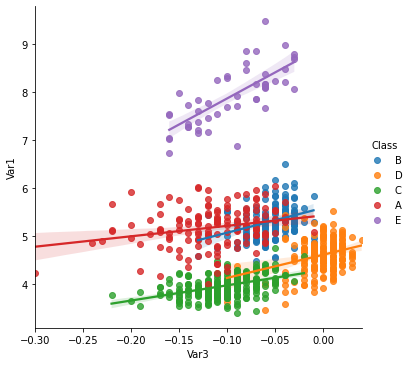

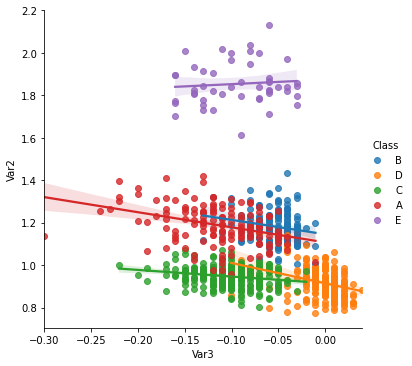

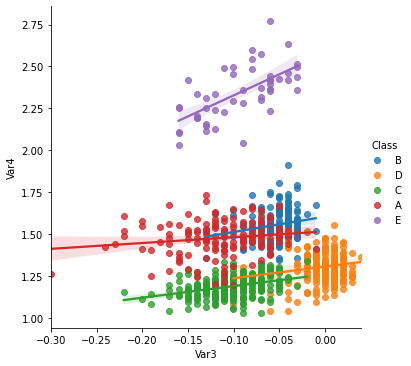

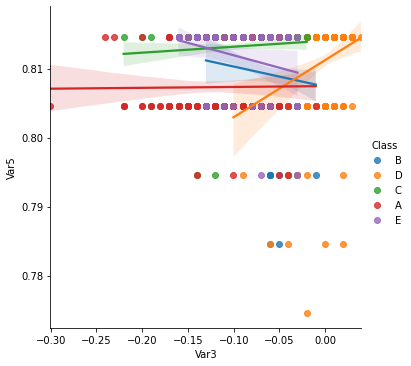

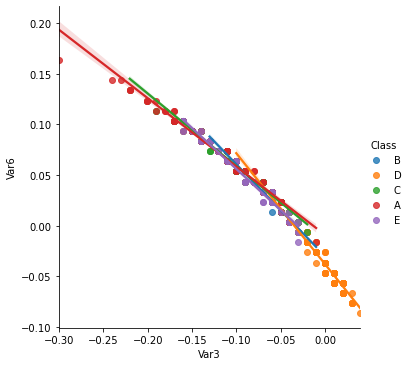

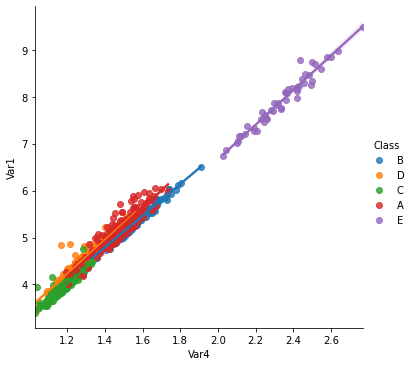

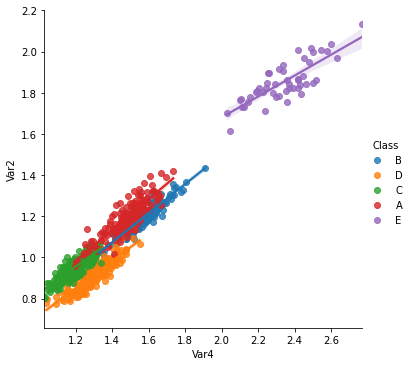

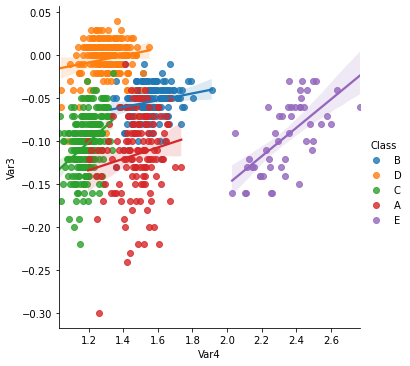

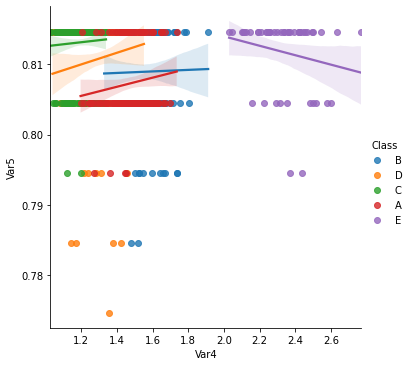

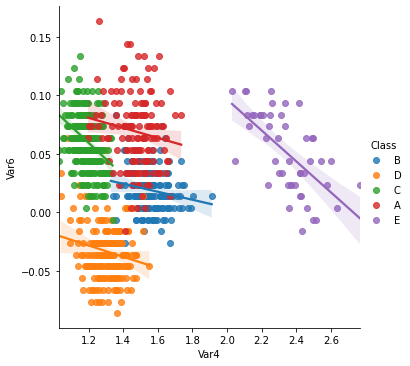

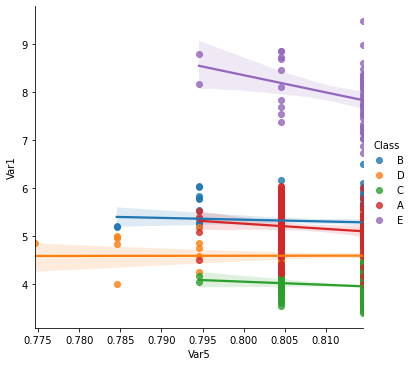

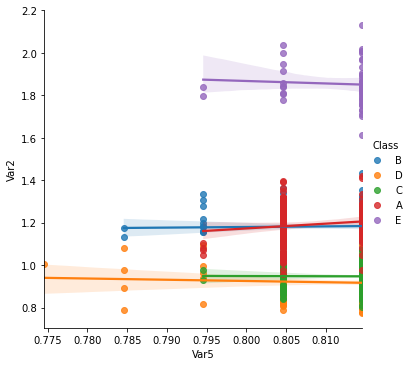

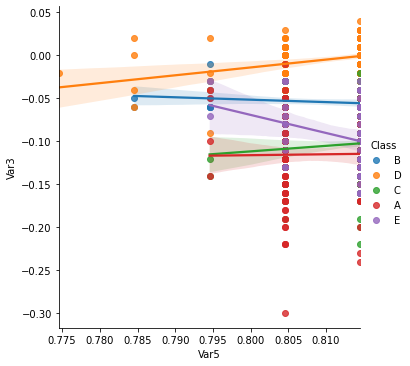

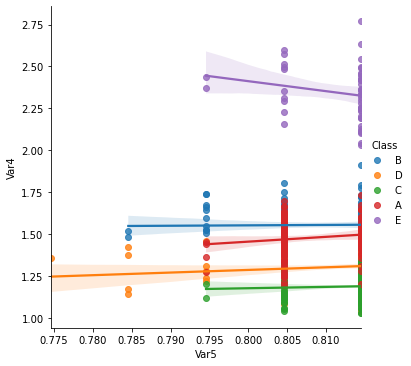

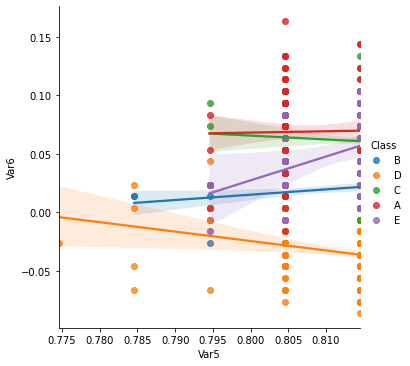

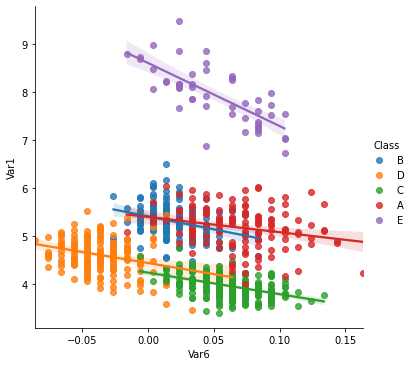

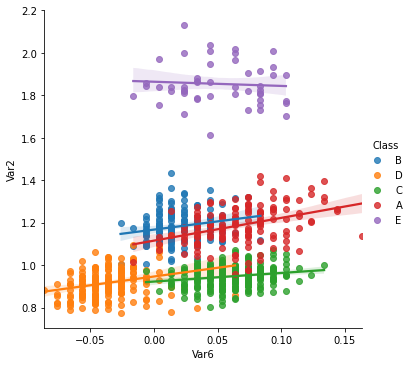

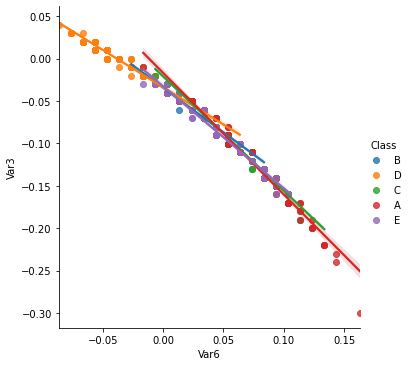

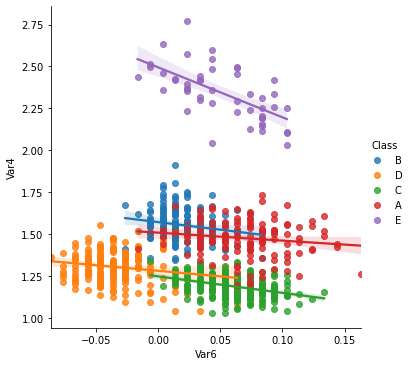

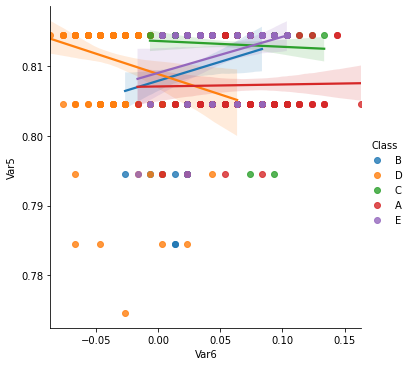

In [18]:
for i in dataset.drop("Class",axis=1).columns:
    for j in dataset.drop("Class",axis=1).columns:
        if i!=j:
            sns.lmplot(i,j, data=dataset, hue='Class')

### Conclusion
Les variables 1, 2, 3 et 4 semblent les plus intéressante pour notre problème (à vérifier dans la suite).   
On prendra éventuellement la variable 6 mais elle a un faible impact.

## B- Preprocessing
Le preprocessing consiste en plusieurs étapes:   
1) Encodage des données (pour les données qualitative)  
2) Normalisation des données  
3) Imputation (remplacer les données manquantes)  
4) Sélection de variables  
5) Extraction  
  
Les étapes 1 et 3 n'ont pas besoin d'être réalisées ici

In [19]:
trainset, testset = train_test_split(df, test_size = 0.25, random_state = 0)

In [20]:
trainset["Class"].value_counts(normalize = True)

C    0.323920
D    0.262458
B    0.181063
A    0.171096
E    0.061462
Name: Class, dtype: float64

In [21]:
testset["Class"].value_counts(normalize = True)

C    0.313433
B    0.238806
A    0.194030
D    0.194030
E    0.059701
Name: Class, dtype: float64

**Normalisation**   
L'objectif est de recentrer les données et de les mettre sur une même échelle.  
Il existe plusieurs stratégies pour cela:  
- MinMax : $\frac{X-X_{min}}{X_{max}-X_{min}}$ toutes les valeurs sont comprises entre 0 et 1
- Standardisation : $X_{scaled}=\frac{X-\mu_X}{\sigma_X}$ on centre et réduit les données
- RobustScaler: $X_{scaled}=\frac{X-mediane}{IQR}$ permet d'avoir une échelle peu sensible aux outliers grâce à l'utilisation de la médiane et de l'écart interquartile

In [22]:
min_max = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

## C- Modelisation

### Algorithme

In [127]:
# Définition des distances testées :
def euclidian_distance_(p1,p2):
    return sum([(i-j)**2  for i, j in zip(p1,p2)])**0.5

def manhattan_distance(p1,p2):
    return sum([abs(i-j) for i, j in zip(p1,p2)])

def minkowski_distance(p1,p2,p=3):
    return sum([abs(i-j)**p  for i, j in zip(p1,p2)])**1/p

def cosine_distance(p1,p2):
    return np.vdot(p1,p2)/(norm(p1)*norm(p2))

def convert2numpy(data):
    if isinstance(data, pd.core.frame.DataFrame):
        return data.to_numpy()
    elif isinstance(data, list): 
        return np.array(data)
    elif isinstance(data,np.ndarray):
        return data
    else:
        raise TypeError("Les données doivent être des types suivants:\npandas.core.frame.DataFrame\nlist\nnumpy.ndarray")

class DataError(Exception):
    """
    Les labels sont présents dans les données
    """
    def __init__(self, name):
        self.name = name

    def __str__ (self):
        return f"Les labels sont présents dans les données."

class knn_:
    def __init__(self, k, metric = euclidian_distance_):
        self.data = None
        self.k = k if k > 0 else 1  
        self.metric = metric

    def fit(self, train):
        self.data = convert2numpy(train)
        if isinstance(train, pd.core.frame.DataFrame):
            self.target_names=sorted(train.iloc[:,-1].unique())
        elif isinstance(train, (np.ndarray,list)):
            self.target_names=sorted(pd.DataFrame(train).iloc[:,-1].unique())
  
    def set_target_names(self, liste):
        if isinstance(liste, (list,np.ndarray)):
            self.target_names_ = liste
    def get_target_names(self):
        return self.target_names_

    target_names = property(get_target_names, set_target_names)

    def score(self, test):
        if self.data is not None:
            test = convert2numpy(test)
            bon_val = 0
            for x in test:
                k_neighbors = sorted(self.data,key = lambda xi: self.metric(xi[:-1],x[:-1]))[:self.k]
                bon_val += 1 if mode(k_neighbors).mode[0][-1] == x[-1] else 0
            return bon_val/len(test)
        else:
            raise NotFittedError(f"This knn_ instance is not fitted yet. Call 'fit' with appropriate arguments before using the '{self.score.__name__}' function.")

    def crossValidation(self,data, fold_nb = 5, test_size=0.25, random_state=0):
        cv = ShuffleSplit(n_splits=fold_nb, test_size=test_size, random_state=random_state)
        cv = cv.split(data)
        resultat = list()
        for train,test in cv:
            train = data.iloc[train,:]
            test = data.iloc[test,:]
            self.fit(train)
            resultat.append(self.score(test))
        return resultat

    def find_best_k(self, validation, k_min = 1, k_max = 15):
        if self.data is not None:
            if isinstance(k_min, int) and isinstance(k_max, int):
                if k_min > 0 and k_max > k_min:
                    best_params_values = dict()
                    for k in range(k_min, k_max):
                        self.k = k
                        best_params_values[k] = self.score(validation)
                    best = max(best_params_values.items(),key=lambda x: x[1])
                    self.k = best[0]
                    return best
                else:
                    raise ValueError("k_min ou k_max n'est pas positif")
            else:
                raise TypeError("k_min ou k_max n'est pas un entier")
        else:
            raise NotFittedError(f"This knn_ instance is not fitted yet. Call 'fit' with appropriate arguments before using the '{self.score.__name__}' function.")

    def predict(self, X, save = True):
        if self.data is not None:
            X = convert2numpy(X)
            if type(X[0][-1]) is not str:
                if not isinstance(X[0],np.ndarray):
                    k_neighbors = sorted(self.data,key = lambda xi: self.metric(x,X))[:self.k]
                    return mode(k_neighbors).mode[0][-1]
                else:
                    val = list()
                    for x in X:
                        k_neighbors = sorted(self.data,key = lambda xi: self.metric(xi,x))[:self.k]
                        val.append(mode(k_neighbors).mode[0][-1])

                    if save is not None:
                        with open(f"deseure--charron_sample.txt", "w") as f:
                            f.writelines(list(map(lambda element: f"class{element}\n",val[:-1])))
                            f.write(f"class{val[-1]}")
                    return val
            else:
                raise DataError("Error")
        else:
            raise NotFittedError(f"This knn_ instance is not fitted yet. Call 'fit' with appropriate arguments before using the '{self.predict.__name__}' function.")

    def convert_labels_to_int(self,y):
        return self.target_names.index(y)

    def confusion_matrix_(self,y_true, y_pred):
        mat = np.zeros((len(self.target_names),len(self.target_names)))
        for i,j in zip(y_true, y_pred):
            mat[self.convert_labels_to_int(i[-1])][self.convert_labels_to_int(j)] += 1
        return mat
    
def isCorrect(testset):
    allLabels = ['classA','classB','classC','classD','classE']
    nbLines = len(testset)

    with open('deseure--charron_sample.txt','r') as fd:
        lines = fd.readlines()

    count=0
    for label in lines:
        if label.strip() in allLabels:
            count+=1
        else:
            if count<nbLines:
                print("Wrong label line:"+str(count+1))
            break
    if count<nbLines:
        print(count,nbLines)
        return False
    else:
        return True

In [128]:
model = knn_(3)

### Première configuration

#### 1. Courbe d'apprentissage

In [129]:
df = pd.DataFrame(standard.fit_transform(dataset.iloc[:,:-1].drop("Var5", axis=1)))
df.columns = colnames[:4] + colnames[5:]
df["Class"] = dataset.iloc[:,-1]
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

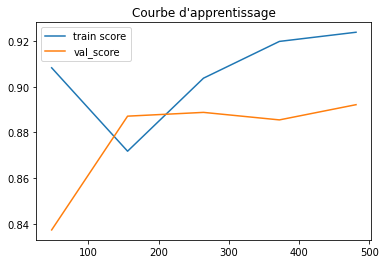

In [130]:
model_knn = KNeighborsClassifier(5, metric = "manhattan")
N, train_score, val_score = learning_curve(model_knn, X_train, y_train,cv=5)

plt.figure()
plt.plot(N, train_score.mean(axis=1), label ="train score")
plt.plot(N, val_score.mean(axis=1), label = "val_score")
plt.title("Courbe d'apprentissage")
plt.legend()
plt.savefig("courbe_apprentissage")
plt.show()

Il manque des données.

#### 2. Suppression de la cinquième variable

##### a) Avant suppression

In [55]:
df = dataset.copy()
trainset, testset = train_test_split(df, test_size = 0.25, random_state = 0)
X_test,y_test = testset.iloc[:,:-1],testset.iloc[:,-1]

In [28]:
model.fit(trainset)
print(model.find_best_k(testset))

(3, 0.9054726368159204)


In [56]:
model = knn_(3)
model.crossValidation(df)[0]

0.8925373134328358

##### b) Après suppression

In [57]:
df = dataset.drop("Var5",axis=1)
trainset, testset = train_test_split(df, test_size = 0.25, random_state = 0)
X_test,y_test = testset.iloc[:,:-1],testset.iloc[:,-1]

In [30]:
model.fit(trainset)
print(model.find_best_k(testset))

(3, 0.9054726368159204)


In [58]:
model = knn_(3)
model.crossValidation(df)[0]

0.8925373134328358

Conclusion: La variable 5 n'apporte aucun avantage, on peut l'enlever pour le moment. On verra par la suite si le choix était justifié.

#### 3. Modification de la distance

In [31]:
trainset, testset = train_test_split(df, test_size = 0.25, random_state = 0)
X_test,y_test = testset.iloc[:,:-1],testset.iloc[:,-1]

In [59]:
val = dict()
for function_distance in [euclidian_distance_, manhattan_distance ,minkowski_distance, cosine_distance]:
    model = knn_(3, function_distance)
    model.fit(trainset)
    val[function_distance.__name__] = (model.find_best_k(testset),model.crossValidation(df)[0])
print(val)

{'euclidian_distance_': ((3, 0.9054726368159204), 0.8925373134328358), 'manhattan_distance': ((3, 0.900497512437811), 0.8955223880597014), 'minkowski_distance': ((3, 0.9054726368159204), 0.8955223880597014), 'cosine_distance': ((4, 0.03980099502487562), 0.023880597014925373)}


**Meilleurs distances:** euclidienne et minkowski_distance  
On utilisera la distance euclidienne par la suite

#### 4. Normalisation des données

##### a) Sans normalisation

In [76]:
df = dataset.drop("Var5",axis=1)
trainset, testset = train_test_split(df, test_size = 0.25, random_state = 0)
model = knn_(3, metric = manhattan_distance)
model.fit(trainset)
print(model.find_best_k(testset))
print(model.crossValidation(df)[0])

(3, 0.900497512437811)
0.900497512437811


##### b) Avec normalisation

In [144]:
val = dict()
for function_normalize, name in zip([min_max, standard, robust], ["MinMax","Standard","Robust"]):
    df = pd.DataFrame(function_normalize.fit_transform(dataset.iloc[:,:-1].drop("Var5", axis=1)))
    df.columns = df.columns.tolist()[:4] + ["Var6"]
    df["Class"] = dataset.iloc[:,-1]
    trainset, testset = train_test_split(df, test_size = 0.25, random_state = 0)
    model = knn_(5, metric= manhattan_distance)
    model.fit(trainset)
    val[name] = (model.find_best_k(testset),model.crossValidation(df)[0])
print(val)

{'MinMax': ((5, 0.9203980099502488), 0.9203980099502488), 'Standard': ((5, 0.9203980099502488), 0.9203980099502488), 'Robust': ((5, 0.9203980099502488), 0.9203980099502488)}


La meilleur méthode est la standardisation

#### Conclusion
Testons maintenant avec et sans la variable 5:

##### a) Avec la Var5

In [80]:
df = pd.DataFrame(standard.fit_transform(dataset.iloc[:,:-1]))
df.columns = df.columns.tolist()[:-1]
df["Class"] = dataset.iloc[:,-1]
trainset, testset = train_test_split(df, test_size = 0.25, random_state = 0)
model = knn_(3)
model.fit(trainset)
print(model.find_best_k(testset))
model = knn_(6, metric = manhattan_distance)
print(model.crossValidation(df)[0])

(6, 0.9054726368159204)
0.900497512437811


##### b) Sans la Var5

In [82]:
df = pd.DataFrame(standard.fit_transform(dataset.iloc[:,:-1].drop("Var5", axis=1)))
df.columns = df.columns.tolist()[:4] + ["Var6"]
df["Class"] = dataset.iloc[:,-1]
trainset, testset = train_test_split(df, test_size = 0.25, random_state = 0)
model = knn_(3, metric = manhattan_distance)
model.fit(trainset)
print(model.find_best_k(testset))
print(model.crossValidation(df)[0])

(5, 0.9203980099502488)
0.9203980099502488


##### Analyse de la matrice de confusion:

In [143]:
df = pd.DataFrame(standard.fit_transform(dataset.iloc[:,:-1].drop("Var5", axis=1)))
df.columns = df.columns.tolist()[:4] + ["Var6"]
df["Class"] = dataset.iloc[:,-1]
trainset, testset = train_test_split(df, test_size = 0.25, random_state = 0)
model = knn_(5, metric = manhattan_distance)
model.fit(trainset)
y_pred = model.predict(testset.iloc[:,:-1])
model.confusion_matrix_(testset.iloc[:,-1],y_pred)

array([[36.,  2.,  1.,  0.,  0.],
       [ 8., 40.,  0.,  0.,  0.],
       [ 1.,  0., 61.,  1.,  0.],
       [ 0.,  0.,  3., 36.,  0.],
       [ 0.,  0.,  0.,  0., 12.]])

On remarque que le modèle confond les labels A et B

#### La meilleur combinaison trouvée est:  
*Var5:* sans  
*Distance:* euclidienne  
*Normalisation:* standardisation    
*k* = 5 (3 si données pas normalisé)   

#### 5. KNN pondéré

##### Algo

In [70]:
class Weighted_KNN:
    def __init__(self, k, metric = euclidian_distance_):
        self.data = None
        self.k = k if k > 0 else 1  
        self.metric = metric

    def fit(self, train):
        self.data = convert2numpy(train)
        if isinstance(train, pd.core.frame.DataFrame):
            self.target_names=sorted(train.iloc[:,-1].unique())
        elif isinstance(train, (np.ndarray,list)):
            self.target_names=sorted(pd.DataFrame(train).iloc[:,-1].unique())
  
    def set_target_names(self, liste):
        if isinstance(liste, (list,np.ndarray)):
            self.target_names_ = liste
    def get_target_names(self):
        return self.target_names_

    target_names = property(get_target_names, set_target_names)

    def score(self, test):
        if self.data is not None:
            test = convert2numpy(test)
            bon_val = 0
            for x in test:
                distance = sorted([(self.metric(xi[:-1],x[:-1]),xi[-1]) for xi in self.data])[:self.k]
                freq = {classe:0 for classe in self.target_names}
                for d in distance:
                    freq[d[1]] += 1/d[0] 
                bon_val += 1 if sorted(freq.items(), key=lambda x: x[1], reverse=True)[0][0] == x[-1] else 0
            return bon_val/len(test)
        else:
            raise NotFittedError(f"This knn_ instance is not fitted yet. Call 'fit' with appropriate arguments before using the '{self.cv.__name__}' function.")

    def crossValidation(self,data, fold_nb = 5, test_size=0.25, random_state=0):
        cv = ShuffleSplit(n_splits=fold_nb, test_size=test_size, random_state=random_state)
        cv = cv.split(data)
        resultat = list()
        for train,test in cv:
            train = data.iloc[train,:]
            test = data.iloc[test,:]
            self.fit(train)
            resultat.append(self.score(test))
        return np.mean(resultat), resultat
            
    def predict(self, X):
        if self.data is not None:
            X = convert2numpy(X)
            result = list()
            for x in X:
                distance = sorted([(self.metric(xi[:-1],x),xi[-1]) for xi in self.data])[:self.k]
                freq = {classe:0 for classe in self.target_names}
                for d in distance:
                    freq[d[1]] += 1/d[0] 
                result.append(sorted(freq.items(), key=lambda x: x[1], reverse=True)[0][0])
            return result
        else:
            raise NotFittedError(f"This knn_ instance is not fitted yet. Call 'fit' with appropriate arguments before using the '{self.cv.__name__}' function.")

    def convert_labels_to_int(self,y):
        return self.target_names.index(y)

    def confusion_matrix_(self,y_true, y_pred):
        mat = np.zeros((len(self.target_names),len(self.target_names)))
        for i,j in zip(y_true, y_pred):
            mat[self.convert_labels_to_int(i[-1])][self.convert_labels_to_int(j)] += 1
        return mat

In [148]:
df = pd.DataFrame(standard.fit_transform(dataset.iloc[:,:-1].drop("Var5", axis=1)))
df.columns = df.columns.tolist()[:4] + ["Var6"]
df["Class"] = dataset.iloc[:,-1]
trainset2, testset2 = train_test_split(df, test_size = 0.25, random_state = 0)

model_w = Weighted_KNN(k, metric = manhattan_distance)
model_w.fit(trainset2)
print(model.score(testset2))
model_w.crossValidation(df)

0.8407960199004975


(0.8865671641791044,
 [0.8955223880597015,
  0.8756218905472637,
  0.8955223880597015,
  0.8706467661691543,
  0.8955223880597015])

Le KNN pondéré en fonction de la distance ne donne pas de meilleurs résultats

#### Score sur le dataset preTest

In [171]:
df_pretest = pd.DataFrame(standard.fit_transform(dataset_pretest.iloc[:,:-1].drop("Var5", axis=1)))
df_pretest.columns = df_pretest.columns.tolist()[:4] + ["Var6"]
df_pretest["Class"] = dataset_pretest.iloc[:,-1]
model = knn_(5)
model.fit(trainset)
print(model.score(df_pretest))

0.8318804483188045


### Deuxième configuration

In [164]:
data = pd.concat([dataset,dataset_pretest],axis=0).reset_index(drop=True)
df = pd.DataFrame(standard.fit_transform(data.iloc[:,:-1].drop("Var5", axis=1)))
df.columns = data.columns.tolist()[:4] + ["Var6"]
df["Class"] = data.iloc[:,-1]

trainset, testset = train_test_split(df,test_size = 0.25, random_state = 0)

model_knn = knn_(5)
model_knn.fit(trainset)
print(model_knn.score(testset))
resultat = model_knn.crossValidation(df)
print("Meilleur k = 5",
      "Score avec validation croisée :",
      "Moyenne = %.4f" % np.mean(resultat),
      "Ecart type = %.4f "% np.std(resultat),
      f"Intervalle = [{min(resultat)}, {max(resultat)}]",sep="\n")

0.9029850746268657
Meilleur k = 5
Score avec validation croisée :
Moyenne = 0.9030
Ecart type = 0.0016 
Intervalle = [0.900497512437811, 0.9054726368159204]


## D- Rendu

In [173]:
data = pd.concat([dataset,dataset_pretest],axis=0).reset_index(drop=True)
df = pd.DataFrame(standard.fit_transform(data.iloc[:,:-1].drop("Var5", axis=1)))
df.columns = data.columns.tolist()[:4] + ["Var6"]
df["Class"] = data.iloc[:,-1]

trainset, testset = train_test_split(df,test_size = 0.25, random_state = 0)

trainset = X_train.copy()
trainset["Class"] = y_train

best_k = 5

df_final = dataset_final.drop("Var5", axis=1)
df_final = pd.DataFrame(standard.fit_transform(df_final))

model = knn_(best_k)
model.fit(trainset)
result = model.predict(df_final,True)
if isCorrect(df_final):
    print("Labels Check : Successfull!")
    result_dico = {classe:nb for classe, nb in zip(np.unique(result, return_counts=True)[0],np.unique(result, return_counts=True)[1])}
    result_dico = sorted(result_dico.items(), key=lambda x: x[1], reverse = True)
    for classe, nb in result_dico:
        print(classe, nb, sep = "    ") 
    print("\nProportion df_final")
    for classe, nb in result_dico:
        print(classe, round(nb/len(df_final),6), sep = "    ") 
    print("\nProportion data")
    print(dataset["Class"].value_counts(normalize = True))
    print("\nProportion pre_test")
    print(dataset_pretest["Class"].value_counts(normalize = True))
    print("\nOn peut calculer la différence de proportion entre les données de preTest et les données prédites:", end=" ")
    result_nb = [nb[1]/len(df_final) for nb in result_dico]
    erreurs = list()
    for originale, predite in zip(dataset_pretest["Class"].value_counts(normalize = True),result_nb):
        erreurs.append(abs(predite-originale)) 
    print("%.2f"%(sum(erreurs)*100),"% de différence.")
else:
    print("Labels Check : fail!")

Labels Check : Successfull!
D    911
C    895
A    658
B    329
E    207

Proportion df_final
D    0.303667
C    0.298333
A    0.219333
B    0.109667
E    0.069

Proportion data
C    0.321295
D    0.245330
B    0.195517
A    0.176837
E    0.061021
Name: Class, dtype: float64

Proportion pre_test
C    0.320050
D    0.237858
B    0.215442
A    0.161893
E    0.064757
Name: Class, dtype: float64

On peut calculer la différence de proportion entre les données de preTest et les données prédites: 13.72 % de différence.
